# Recognizing handwritten digits ✍️

---

<img src="https://www.cenet.org/wp-content/uploads/2018/10/neonbrand-618322-unsplash.jpg" />

Photo by [Neon Brand](https://unsplash.com/@neonbrand)

---

MNIST is a dataset published in 1998 by *Yann LeCun* (current Head of AI at Facebook), *Corinna Cortes and Chris Burges* when working on handwritten digit recognition. 

It is **THE ultimate challenge** of computer vision data scientist: http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html

<img style="margin-left:40px; width:250px;" src="https://www.researchgate.net/profile/Kai_Labusch/publication/242300247/figure/fig1/AS:298429235384320@1448162482185/Samples-from-the-MNIST-data-set-of-handwritten-digits.png">

More information about the dataset: https://www.openml.org/d/554

In [2]:
# First we load the data using scikit-learn (it takes a bit of time)
import pandas as pd
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

/Users/schoolofdata/.pyenv/versions/3.10.12/envs/Artefact/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Q1**. Features and labels can be accessed with the keys `data` and `target` of MNIST dataset loaded previously.
- Store the features in a `X` variable and the labels in a `y` variable
- What is the signification of the features in this usecase? The labels?
- What is the size of the images?
- What can be the values 

In [6]:
# TODO: Data comprehension
import math
# Demander comment faire sans passer par un dataframe
X = mnist['data']
y = mnist['target']
print(f'X.columns {X.columns}')
print(f'y {y.head()}') 
# - What can be the values: des chiffres entre 0 et 9

#df = pd.DataFrame(data = mnist.data, columns = mnist.feature_names)
#df['target'] = mnist.target
#print(f'colonnes: {df.columns}')

math.sqrt(len(X.columns))
# - What is the size of the images?: imagettes de 28x28 pixels


X.columns Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)
y 0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


28.0

TODO: Data comprehension

**Q2**. Visualize one random image.

> 🔦 **Hint**: As black pixel correspond to zero values while white pixels have values equal to 255, plotting the images with matplotlib will display background in black. You can set `cmap = "gray_r"` in order to inverse the colormap and paint the digit in black with white background.

(70000, 784)
<class 'pandas.core.frame.DataFrame'>
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781

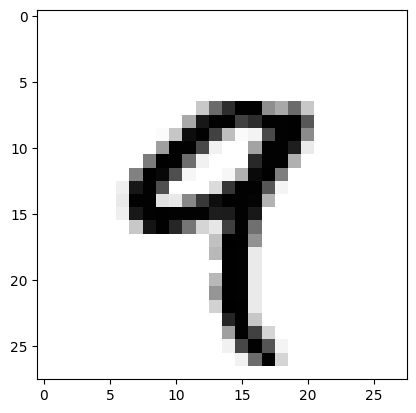

In [24]:
# TODO: Data visualization
# from stackoverflow
from matplotlib import pyplot as plt
import numpy as np

print(X.shape)
print(type(X))
# !!! X est un df pas un np.array

X = pd.DataFrame(X)
print(X.head())
#print(X.iloc[4])

first_image = X.iloc[4]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray_r')
plt.show()

**Q2 Bonus**. Visualize several images in multiple rows/columns with label written as title

type(y) <class 'pandas.core.series.Series'>
y.iloc[5] 2


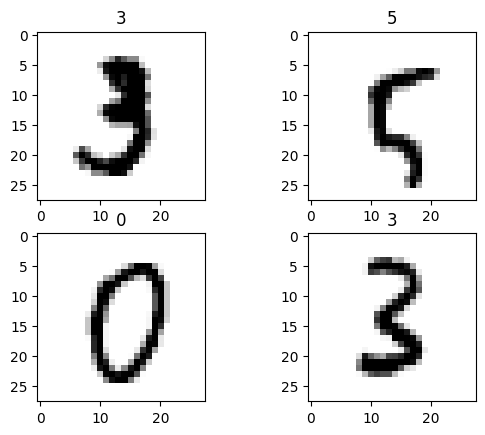

In [32]:
# TODO: Data visualization
print(f'type(y) {type(y)}')
print(f'y.iloc[5] {y.iloc[5]}')

def multiplots(X, y):
    # voir pour générer les rows randomly
    rows = [10, 100, 1000, 50000] 
    fig, axs = plt.subplots(2, 2)    
    
    for i in range(2):
        for j in range(2):
            row = 2 * i + j
            imag = X.iloc[rows[row]]
            imag = np.array(imag, dtype='float')
            pixels = imag.reshape((28, 28))
            axs[i, j].imshow(pixels, cmap='gray_r')
            axs[i, j].set_title(y.iloc[rows[row]])
    
multiplots(X, y)

**Q3**. Sample the dataset by keeping only 5000 randomly chosen images. For example using the function `random.randint` from Numpy

In [43]:
# TODO: Sampling
from random import *
seed(6)
random_rows = sample(range(1, X.shape[0]), 5000)
print(random_rows)
mask = X.index.isin(random_rows)

# X sample
X_sample = X[mask]
print(X_sample.shape)

# y sample
y_sample = y[mask]
print(y_sample.shape)

[10561, 63575, 34292, 4827, 60, 19082, 61638, 48911, 41863, 2870, 35744, 64074, 25967, 54265, 12349, 25295, 34803, 11549, 55667, 43986, 12208, 47467, 53733, 32832, 58355, 12292, 25843, 38167, 12787, 5988, 26329, 47236, 63794, 25392, 67457, 66020, 3726, 47367, 32099, 56321, 39889, 46843, 15675, 11756, 65557, 68848, 26100, 15313, 35113, 40932, 25720, 49783, 63406, 29195, 18102, 27511, 68439, 1642, 24740, 22170, 2236, 43636, 40125, 49104, 49468, 69124, 51009, 37900, 16625, 64063, 7055, 24295, 55429, 52136, 12581, 57836, 32154, 11673, 58473, 58615, 49810, 10024, 67724, 55892, 61726, 39776, 53617, 11264, 25185, 34842, 59161, 63920, 22562, 2431, 2867, 16187, 32918, 47324, 24584, 33596, 65895, 59184, 43181, 67748, 33393, 53815, 55279, 63623, 35120, 62222, 62724, 64491, 18637, 49477, 65097, 40066, 61245, 42388, 48035, 21369, 49289, 34840, 41958, 52204, 63963, 20734, 38115, 812, 58899, 7485, 23931, 3947, 14699, 48616, 47450, 65201, 8163, 25249, 20236, 35292, 1943, 55328, 68795, 64448, 9938, 614

We separate sample data into training set and testing set. We will learn in the next lessons that it is critical if you want to evaluate properly the perfomance of your model. For now we will write the code line for you:

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, train_size=0.8)

**Q4**. Fit a Logistic Regression to the training data. Evaluate the performance of your model. Comment

In [46]:
# TODO: Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

/Users/schoolofdata/.pyenv/versions/3.10.12/envs/Artefact/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
# TODO: Logistic Regression Accuracy
from sklearn.metrics import accuracy_score
print(f'accurancy de LR: {accuracy_score(y_pred, y_test)}')

accurancy de LR: 0.868
